<a href="https://colab.research.google.com/github/alfbrynn/MachineLearning/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
from sklearn.neighbors import NearestNeighbors
import random


# untuk tampilan lebih rapih
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551805 sha256=4e2df59b4c2a8a50c2ee50318730ab428a96158122dc7757679984f3991f487b
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [4]:
# ubah path jika berbeda
path = '/content/CC GENERAL.csv'
df = pd.read_csv(path)


# info awal
print('Shape:', df.shape)
df.info()
df.head()


# statistik ringkas
df.describe().T

Shape: (8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   i

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [5]:
# cek missing values
df.isnull().sum().sort_values(ascending=False)

,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
BALANCE,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0


In [6]:
# Contoh: lihat kolom numerik
num_df = df.select_dtypes(include=['int64','float64']).copy()
num_df.columns


# Imputasi: gunakan mean untuk kolom numeric yang memiliki missing values
for col in num_df.columns:
  if num_df[col].isnull().sum() > 0:
    # beberapa kolom seperti 'CREDIT_LIMIT' atau 'MINIMUM_PAYMENTS' umum kosong
    num_df[col].fillna(num_df[col].mean(), inplace=True)


# Buat fitur baru: BALANCE to PURCHASES ratio
# Pastikan kolom memang ada, jika tidak, ganti sesuai nama di dataset
if 'BALANCE' in num_df.columns and 'PURCHASES' in num_df.columns:
  eps = 1e-6
  num_df['BALANCE_to_PURCHASES'] = num_df['BALANCE'] / (num_df['PURCHASES'] + eps)
else:
  print('Kolom BALANCE atau PURCHASES tidak ditemukan, cek nama kolom dataset Anda')


# Pilih fitur yang akan digunakan untuk clustering (anda bisa menyesuaikan)
# Umumnya kita masukkan sebagian besar fitur numerik kecuali ID
features = [c for c in num_df.columns if c.upper() not in ['CUST_ID','CUSTID','ID']]
X = num_df[features].copy()


# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print('Shape X_scaled:', X_scaled.shape)

Shape X_scaled: (8950, 18)


/tmp/ipython-input-3122419584.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_df[col].fillna(num_df[col].mean(), inplace=True)


In [7]:
# coba beberapa k
sil_scores = {}
db_scores = {}
from tqdm import tqdm


for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X_scaled)
  sil = silhouette_score(X_scaled, labels)
  db = davies_bouldin_score(X_scaled, labels)
  sil_scores[k] = sil
  db_scores[k] = db


# tampilkan hasil
print('Silhouette scores:')
for k, s in sil_scores.items():
  print(k, round(s,4))
  print('\nDavies-Bouldin scores:')
for k, d in db_scores.items():
  print(k, round(d,4))


# pilih k terbaik berdasarkan silhouette (max)
best_k = max(sil_scores, key=sil_scores.get)
print('\nBest K by Silhouette:', best_k)


# fit final KMeans
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(X_scaled)


# simpan centroids (untuk referensi)
centroids = kmeans_final.cluster_centers_

Silhouette scores:
2 0.1967

Davies-Bouldin scores:
3 0.2469

Davies-Bouldin scores:
4 0.1855

Davies-Bouldin scores:
5 0.1802

Davies-Bouldin scores:
6 0.1907

Davies-Bouldin scores:
7 0.2016

Davies-Bouldin scores:
8 0.2121

Davies-Bouldin scores:
9 0.2188

Davies-Bouldin scores:
10 0.2224

Davies-Bouldin scores:
2 1.9404
3 1.6271
4 1.6169
5 1.5824
6 1.544
7 1.443
8 1.4754
9 1.4387
10 1.3551

Best K by Silhouette: 3


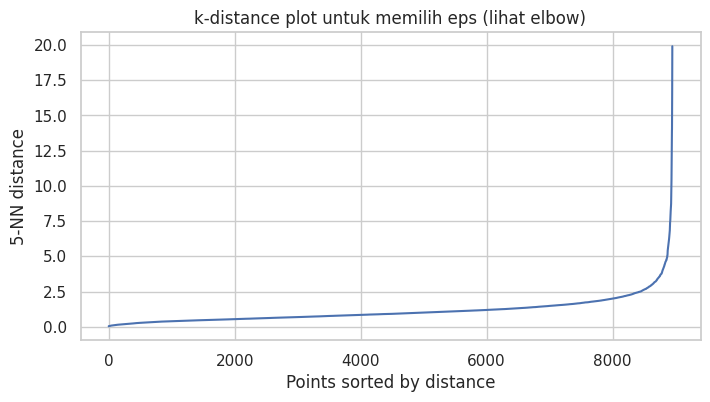

In [8]:
# gunakan NearestNeighbors untuk k-dist plot (k = min_samples)
min_samples = 5
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled)
dists, idxs = nbrs.kneighbors(X_scaled)
# ambil jarak ke tetangga k-th terbesar -> untuk semua point ambil dists[:, -1]
d_k = np.sort(dists[:, -1])


# plot k-distance
plt.figure(figsize=(8,4))
plt.plot(d_k)
plt.ylabel(f'{min_samples}-NN distance')
plt.xlabel('Points sorted by distance')
plt.title('k-distance plot untuk memilih eps (lihat elbow)')
plt.show()

In [36]:
# Contoh nilai eps; ganti setelah melihat plot
eps_choice = 2.0
dbscan = DBSCAN(eps=eps_choice, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_scaled)


# hitung berapa banyak cluster (abaikan noise label -1)
unique_labels = set(labels_dbscan)
n_clusters_dbscan = len([l for l in unique_labels if l != -1])
print('Jumlah cluster (DBSCAN, tidak termasuk noise):', n_clusters_dbscan)
print('Jumlah noise points (label -1):', list(labels_dbscan).count(-1))


# Evaluasi: silhouette dan DBI hanya jika ada >=2 cluster (non-noise)
mask_non_noise = labels_dbscan != -1
if len(set(labels_dbscan[mask_non_noise])) > 1:
  sil_dbscan = silhouette_score(X_scaled[mask_non_noise], labels_dbscan[mask_non_noise])
  db_dbscan = davies_bouldin_score(X_scaled[mask_non_noise], labels_dbscan[mask_non_noise])
  print('DBSCAN Silhouette (non-noise):', sil_dbscan)
  print('DBSCAN Davies-Bouldin (non-noise):', db_dbscan)
else:
  print('Tidak cukup cluster (non-noise) untuk menghitung metrik DBSCAN')

Jumlah cluster (DBSCAN, tidak termasuk noise): 4
Jumlah noise points (label -1): 634
DBSCAN Silhouette (non-noise): 0.36518301576374657
DBSCAN Davies-Bouldin (non-noise): 0.601354059248203
eps=1.0: clusters=17, noise=3229, Sil=-0.143, DBI=0.981
eps=1.5: clusters=7, noise=1397, Sil=0.066, DBI=0.798
eps=2.0: clusters=4, noise=634, Sil=0.365, DBI=0.601
eps=2.5: clusters=2, noise=358, Sil=0.393, DBI=0.719
eps=3.0: cluster tidak cukup (semua noise)


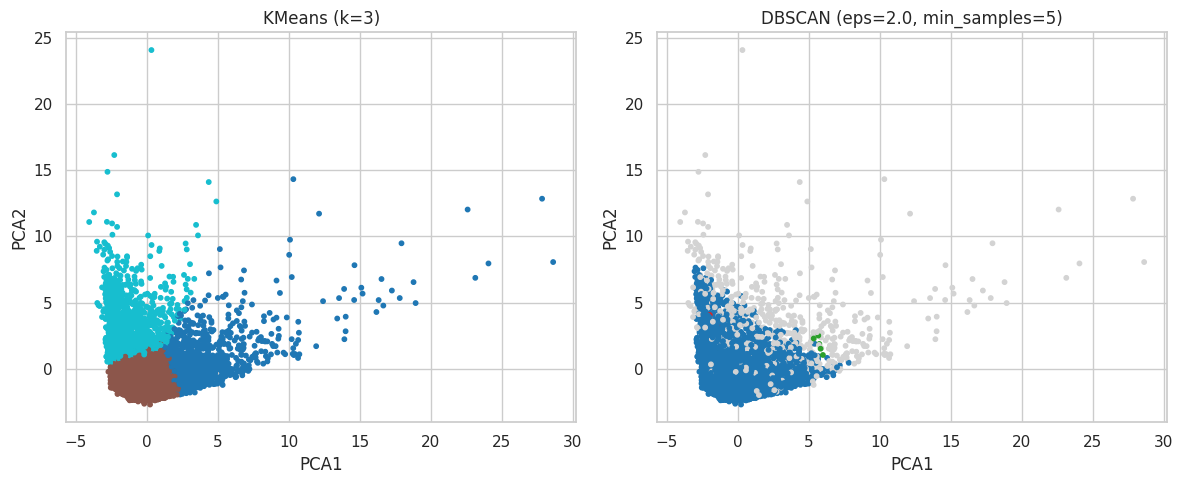

In [39]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='tab10', s=10)
plt.title(f'KMeans (k={best_k})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(1, 2, 2)
# Map numerical DBSCAN labels to colors using a colormap
# Use matplotlib.colormaps.get_cmap for newer matplotlib versions
cmap = plt.colormaps.get_cmap('tab10')
colors_db = [cmap(lab) if lab != -1 else 'lightgrey' for lab in labels_dbscan]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors_db, s=10) # Removed cmap here
plt.title(f'DBSCAN (eps={eps_choice}, min_samples={min_samples})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

In [38]:
# Build Annoy index
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, metric='euclidean')
for i, v in enumerate(X_scaled):
  ann.add_item(i, v)
ann.build(n_trees=50)


# Pilih query indices (3-5 random)
random.seed(42)
n_queries = 5
query_indices = random.sample(range(X_scaled.shape[0]), n_queries)


# ambil tetangga terdekat (mis. top 10)
n_neighbors = 10
results = {}
for q in query_indices:
  neighbors, distances = ann.get_nns_by_item(q, n_neighbors, include_distances=True)
  results[q] = (neighbors, distances)


# Tampilkan
for q, (nbrs, dists) in results.items():
  print('\nQuery Point Index:', q)
  print('Cluster (KMeans):', labels_kmeans[q])
  print('Neighbors (idx) | Distance | Cluster(KMeans)')
  for ni, di in zip(nbrs, dists):
    print(f'{ni:6d} | {di:.4f} | {labels_kmeans[ni]}')


Query Point Index: 1824
Cluster (KMeans): 0
Neighbors (idx) | Distance | Cluster(KMeans)
  1824 | 0.0000 | 0
  5794 | 0.8789 | 0
  2205 | 1.0746 | 0
   545 | 1.1253 | 0
  3609 | 1.3323 | 0
  1650 | 1.5828 | 0
  2760 | 1.5956 | 0
  3770 | 1.6608 | 0
  6084 | 1.6637 | 0
   417 | 1.6655 | 0

Query Point Index: 409
Cluster (KMeans): 1
Neighbors (idx) | Distance | Cluster(KMeans)
   409 | 0.0000 | 1
  6999 | 2.1934 | 1
  3423 | 2.2179 | 0
  2856 | 2.2734 | 1
  1889 | 2.6764 | 1
   653 | 2.7008 | 1
   498 | 2.7658 | 1
  4231 | 2.8758 | 1
  2675 | 2.8931 | 1
  4859 | 2.9211 | 1

Query Point Index: 4506
Cluster (KMeans): 2
Neighbors (idx) | Distance | Cluster(KMeans)
  4506 | 0.0000 | 2
   113 | 0.4280 | 2
  3666 | 0.5298 | 2
  2306 | 0.6908 | 2
  3331 | 0.6912 | 2
  5789 | 0.7237 | 2
  3871 | 0.7724 | 2
  4617 | 0.7873 | 2
   322 | 0.7994 | 2
  2606 | 0.8509 | 2

Query Point Index: 4012
Cluster (KMeans): 0
Neighbors (idx) | Distance | Cluster(KMeans)
  4012 | 0.0000 | 0
  3553 | 2.0025 | 0
 

a. Perbedaan hasil KMeans dan DBSCAN:

KMeans menghasilkan 3 cluster (sesuai dengan nilai Silhouette terbaik). KMeans cenderung membagi data menjadi cluster berbentuk bulat dengan ukuran yang relatif sama. Setiap titik data akan dimasukkan ke dalam cluster terdekatnya.

DBSCAN, dengan parameter eps=2.0 dan min_samples=5, menghasilkan 4 cluster dan mengidentifikasi 634 titik sebagai noise (tidak termasuk dalam cluster manapun). DBSCAN cocok untuk menemukan cluster dengan bentuk tidak beraturan dan sensitif terhadap kepadatan data.

Untuk menentukan model mana yang lebih baik, kita perlu melihat metrik evaluasi dan visualisasi:

Metrik: DBSCAN menunjukkan nilai Silhouette (0.365) dan Davies-Bouldin (0.601) yang lebih baik dibandingkan KMeans (Silhouette: 0.247, DBI: 1.627 untuk k=3). Nilai Silhouette yang lebih tinggi dan Davies-Bouldin yang lebih rendah menunjukkan pemisahan cluster yang lebih baik.
Visualisasi: Plot PCA menunjukkan bahwa DBSCAN mampu mengidentifikasi cluster dengan batas yang lebih jelas dan memisahkan noise (titik abu-abu), sementara KMeans membagi ruang data secara lebih merata tanpa memperhitungkan kepadatan atau bentuk cluster yang kompleks.
Berdasarkan metrik evaluasi dan visualisasi, DBSCAN terlihat lebih baik dalam mengidentifikasi struktur cluster pada dataset ini, terutama dengan kemampuannya menangani noise dan menemukan cluster berbasis kepadatan.

b. Nilai metrik terbaik:

Untuk KMeans, nilai Silhouette terbaik adalah 0.2469 pada k=3. Nilai Davies-Bouldin terbaik untuk KMeans adalah 1.3551 pada k=10, namun kita memilih k berdasarkan Silhouette terbaik.
Untuk DBSCAN (dengan eps=2.0, min_samples=5), nilai Silhouette (non-noise) adalah 0.3652 dan nilai Davies-Bouldin (non-noise) adalah 0.6014.
c. Hasil query Annoy:

Dari hasil query Annoy, kita melihat bahwa untuk titik query yang dipilih secara acak, sebagian besar tetangga terdekat yang ditemukan termasuk dalam cluster KMeans yang sama dengan titik query tersebut.
Misalnya, untuk Query Point Index 1824 (Cluster 0), 9 dari 10 tetangga terdekat juga berada di Cluster 0. Untuk Query Point Index 4506 (Cluster 2), semua 9 tetangga terdekat berada di Cluster 2.
Namun, ada beberapa kasus di mana tetangga terdekat berada di cluster KMeans yang berbeda, seperti pada Query Point Index 409 (Cluster 1), di mana titik 3423 (Cluster 0) muncul sebagai tetangga terdekat ketiga. Hal ini wajar terjadi karena Annoy mencari tetangga terdekat berdasarkan jarak dalam ruang fitur yang diskalakan, yang mungkin tidak selalu sepenuhnya selaras dengan batas cluster yang ditentukan oleh KMeans, terutama di area perbatasan antar cluster.
Secara umum, Annoy berhasil menemukan tetangga terdekat berdasarkan kedekatan fitur, dan sebagian besar tetangga ini berada di cluster KMeans yang sama, menunjukkan konsistensi antara kedekatan ruang fitur dan hasil clustering KMeans.